In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
model = tf.keras.models.load_model('./models/object_detection_20211025.h5')

In [24]:
def object_detection(path):    
    image = load_img(path)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))
    
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    coords = model.predict(test_arr)
    
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

# OCR

In [26]:
import pytesseract as pt

(423, 557) (597, 593)


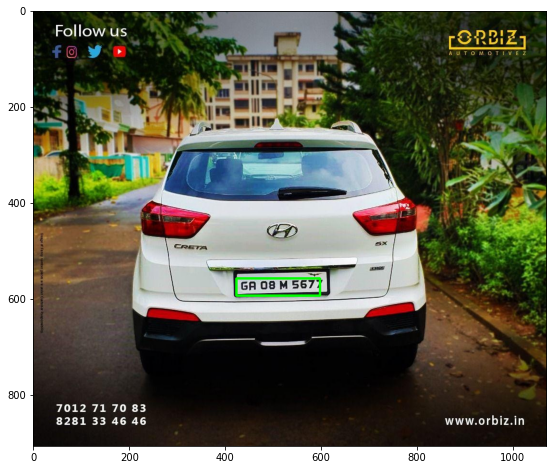

In [27]:
path = '.\images\\N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [28]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

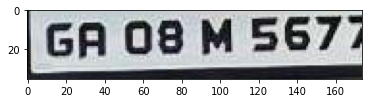

In [29]:
plt.imshow(roi)
plt.show()

In [31]:
text = pt.image_to_string(roi)
print(text)

GA 08 M 5677

